# RNN: Sequence Models

In the last skill we covered the theory and concepts behind RNNs, Bidirectional RNNs, LSTMs, and GRUs.

In this skill, we'll start building models to apply these concepts.

## Single-Layer RNN
Here's the single-layer **SimpleRNN** approach: great for simpler sequence tasks where only forward processing is needed.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense

# Define parameters
EMBEDDING_OUTPUT_DIM = 64
MAX_LEN = 25
RNN_UNITS = 16
VOCAB_SIZE = 1000

# Define SimpleRNN model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM, input_length=MAX_LEN), # input_length deprecated
    SimpleRNN(RNN_UNITS, return_sequences=True),
    Dense(1, activation='sigmoid')
])



# Print model summary to understand the architecture
model.summary()

/Users/barrios/opt/anaconda3/envs/tf_pro_dev/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Bidirectional RNN

Here we set up a bidirectional RNN: great for processing each input from both directions (left-to-right and right-to-left) and then combining the outputs.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense

# Define parameters
EMBEDDING_OUTPUT_DIM = 64
MAX_LEN = 25
RNN_UNITS = 16
VOCAB_SIZE = 1000


# Define a bidirectional RNN model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM, input_length=MAX_LEN), # input_length is deprecated
    Bidirectional(SimpleRNN(RNN_UNITS, return_sequences=True)),
    Dense(1, activation='sigmoid')
])


# Print model summary to understand the architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


## Single-Layer LSTM

Here's a single-layer **LSTM** model: useful for processing sequence data in a single direction (left-to-right).

To review: LSTMs are great at capturing long-term dependencies and designed to mitigate the vanishing gradient problem often encountered in standard RNNs.



In [6]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define model parameters
EMBEDDING_OUTPUT_DIM = 64
MAX_LEN = 25
LSTM_UNITS = 16

# Build single-layer LSTM model
model = Sequential([
    Embedding(input_dim=1000, output_dim=EMBEDDING_OUTPUT_DIM),
    LSTM(LSTM_UNITS),
    Dense(1, activation='sigmoid')
], name='Single_LSTM_model')


# Display the model summary
model.summary()


Model: "Single_LSTM_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Bidirectional LSTM
Here we have a bidirectional LSTM: adept at processing inputs in both forward and reverse directions and combining the outputs.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define parameters
EMBEDDING_OUTPUT_DIM = 64
MAX_LEN = 25
LSTM_UNITS = 16
VOCAB_SIZE = 1000

# Define a bidirectional LSTM model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM),
    Bidirectional(LSTM(LSTM_UNITS, return_sequences=True)),
    Dense(1, activation='sigmoid')
], name='Bidirectional_LSTM_model')


# Print model summary to understand the architecture
model.summary()


Model: "Bidirectional_LSTM_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Single-Layer GRU
Here's a single-layer GRU: great for processing sequence data in a forward direction only.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Define parameters
EMBEDDING_OUTPUT_DIM = 64
MAX_LEN = 25
GRU_UNITS = 16
VOCAB_SIZE = 1000


# Define a single-layer GRU model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM),
    GRU(GRU_UNITS, return_sequences=True),
    Dense(1, activation='sigmoid')
], name='Single_GRU_model')


# Print model summary to understand the architecture
model.summary()


Model: "Single_GRU_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Bidirectional GRU
Here's a bidirectional GRU layer: when you want to processes inputs in both directions, combining the outputs.

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense

# Define parameters
EMBEDDING_OUTPUT_DIM = 64
MAX_LEN = 25
GRU_UNITS = 16
VOCAB_SIZE = 1000


# Define a bidirectional GRU model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM),
    Bidirectional(GRU(GRU_UNITS, return_sequences=True)),
    Dense(1, activation='sigmoid')
], name='Bidirectional_GRU_model')



# Print model summary to understand the architecture
model.summary()


Model: "Bidirectional_GRU_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Challenge
your task is to build a baseline model using DNN and then RNN. Aim to avoid overfitting and also consider using a functional API approach. Here is an example to review bothe **Sequential** and **Functional APIs**:

### Sequential API

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define parameters
EMBEDDING_OUTPUT_DIM = 64
RNN_UNITS = 16
VOCAB_SIZE = 1000

# SimpleRNN model: Sequential API
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM),
    SimpleRNN(RNN_UNITS, return_sequences=True),  # Simple RNN layer
    Dense(1, activation='sigmoid')
], name="Sequential_RNN_Model")

# Model summary
model.summary()


### Functional API

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Model

# Define parameters
EMBEDDING_OUTPUT_DIM = 64
MAX_LEN = 25
RNN_UNITS = 16
VOCAB_SIZE = 1000

# Define a simple RNN model using the Functional API
inputs = Input(shape=(MAX_LEN,))
x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM)(inputs)
x = SimpleRNN(RNN_UNITS, return_sequences=True)(x)
outputs = Dense(1, activation='sigmoid')(x)


# Create the model
model = Model(inputs=inputs, outputs=outputs, name="Functional_RNN_Model")

# Print model summary to understand the architecture
model.summary()


Model: "Functional_RNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_10 (Embedding)        │ (None, 25, 64)         │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 25, 16)         │         1,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25, 1)          │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,313 (255.13 KB)

 Trainable params: 65,313 (255.13 KB)

 Non-trainable params: 0 (0.00 B)

# Challenge Starter Code

### Sequential Baseline Model

In [3]:
!pip uninstall tensorflow-metal -y

Found existing installation: tensorflow-metal 1.1.0
Uninstalling tensorflow-metal-1.1.0:
  Successfully uninstalled tensorflow-metal-1.1.0


In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Hyperparameters
MAX_SEQUENCE_LEN = 25
OUTPUT_DIM = 64
DENSE_UNITS = 128
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 128
INPUT_LENGTH = MAX_SEQUENCE_LEN -1 


# Part 1: Download and Load the Corpus
!wget https://www.gutenberg.org/files/1041/1041-0.txt -O tiny_corpus.txt
with open('tiny_corpus.txt', 'r', encoding='utf-8') as file:
    corpus = file.read()

corpus = corpus[:10000] # Limit corpus size to 10,000 chars

# Part 2: Initialize and Fit the Text Vectorization Layer
corpus_lines = corpus.split('\n')
text_ds = tf.data.Dataset.from_tensor_slices(corpus_lines).batch(128)# Batch to reduce memory usage

# Define TextVectorization layer
vectorizer = keras.layers.TextVectorization(output_mode='int', output_sequence_length=None)
vectorizer.adapt(text_ds)

# Convert the entire corpus to a sequence of numbers
sequence = vectorizer(corpus_lines)
input_sequences = []

# Generate n-grams
for seq in sequence:
    for i in range(1, len(seq)):
        n_gram_sequence = seq[:i + 1]
        input_sequences.append(n_gram_sequence.numpy())

# Pad sequences (uniform length)
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Part 3: Create X and y from the Padded Sequences
X = input_sequences[:, :-1]
y = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=len(vectorizer.get_vocabulary()))

# Define and Compile the Model using Sequential API
model = Sequential([
    Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=OUTPUT_DIM, input_length=MAX_SEQUENCE_LEN -1),
    Flatten(),
    Dense(DENSE_UNITS, activation='relu'),
    Dense(len(vectorizer.get_vocabulary()), activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)


--2024-11-15 06:56:54--  https://www.gutenberg.org/files/1041/1041-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100225 (98K) [text/plain]
Saving to: ‘tiny_corpus.txt’

tiny_corpus.txt     100%[===================>]  97.88K  --.-KB/s    in 0.1s    

2024-11-15 06:56:54 (730 KB/s) - ‘tiny_corpus.txt’ saved [100225/100225]



2024-11-15 06:56:54.974221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2473 - loss: 6.5331 - val_accuracy: 0.3707 - val_loss: 5.9062
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3921 - loss: 5.2536 - val_accuracy: 0.3707 - val_loss: 5.1859
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3963 - loss: 4.3632 - val_accuracy: 0.3707 - val_loss: 5.0300
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3906 - loss: 4.0757 - val_accuracy: 0.3707 - val_loss: 4.9017
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3901 - loss: 3.8966 - val_accuracy: 0.3727 - val_loss: 4.9105
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4160 - loss: 3.6555 - val_accuracy: 0.3768 - val_loss: 4.9086
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4026 - loss: 3.6628 - val_accuracy: 0.3687 - val_loss: 4.9580
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4102 - loss: 3.5466 - val_accuracy: 0.3727 - v

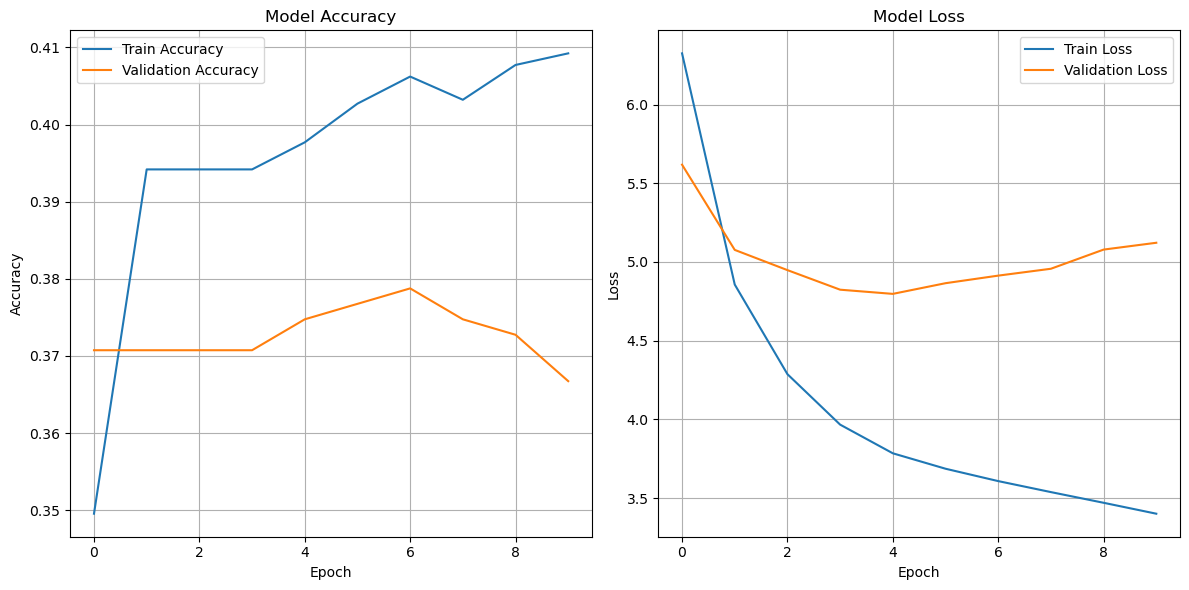

In [19]:
# Part 4: Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)